Лабораторная работа 2. Нелинейная регрессия

Потоцкий Д.А., 221702

Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Подключение набора данных

In [4]:
df = pd.read_csv("housing.csv")

Перевод значений в целочисленный тип

In [5]:
columns = ['price', 'area']
for column in columns:
    df[column] = pd.to_numeric(df[column])

Построение графика

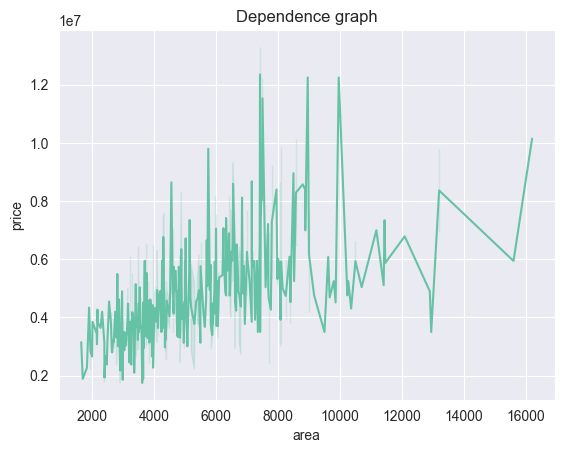

In [7]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(x=df["area"], y=df["price"],)
plt.title('Dependence graph')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

Построение модели

In [8]:
x = np.array(df["area"]).reshape(-1, 1)
y = np.array(df["price"]).reshape(-1, 1)

Оценка точности модели

In [9]:
polynomial_degree = 2
regression = make_pipeline(PolynomialFeatures(polynomial_degree), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 2363908046361.731


Сравнение предсказания модели с эталонами. Для этого построим графики

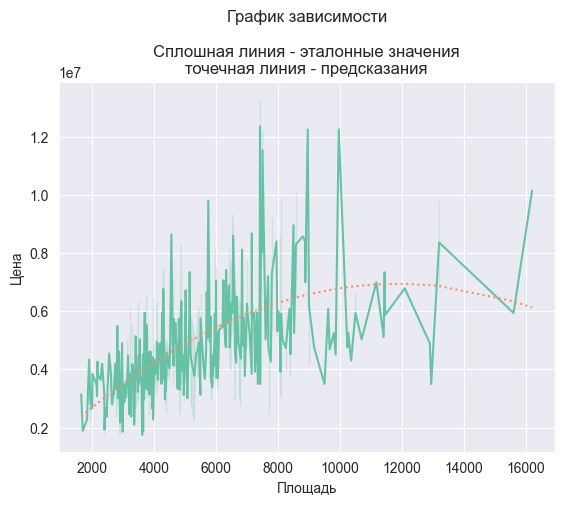

In [10]:
sns.lineplot(
x=df["area"],
y=df["price"],
linestyle="solid"
)
sns.lineplot(
x=df["area"],
y=predictions.reshape(-1),
linestyle="dotted"
)
plt.title(
'График зависимости\n\n'
'Сплошная линия - эталонные значения\n'
'точечная линия - предсказания'
)
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

Построение уравнения регрессии

In [11]:
x_parameters = np.append(
regression['linearregression'].intercept_[0],
regression['linearregression'].coef_[0][1:]
)
x_parameters

array([ 7.95440758e+05,  1.03518489e+03, -4.35645185e-02])

Из этого следует уравнение: y = 795440.75 + 1035.18x - 0.0435x^2

Можно получить знания о зависимости цены зданий от площади